# PROYECTO INDIVIDUAL N°2 DATA ANALYST

## _Análisis Exploratorio de los datos_

Se realiza un análisis exploratorio de los datos para conocer a profundidad los datos con los que se van a trabajar, los objetivos de este serán:

* Aplicar estadística descriptiva a los datasets
* Realizar análisis univariado y bivariado
* Encontrar patrones, outliers, anomalías, entre otros

Lo cual nos ayudara a realizar las transformaciones que sean necesarias para nuestro análisis.

In [33]:
# Importamos librerias necesarias para trabajar los datasets
import pandas as pd

A continuación, procedemos a crear nuestros dataframe con los datasets que se van a trabajar y su respectivo análisis exploratorio.

### _Dataframe 1_

_Este contiene datos sobre penetración de velocidad de internet por cada 100 hogares de las provincias de Argentina en los periodos que se pueden ver a continuación_

In [34]:
# Creamos el dataframe importando el archivo a leer
df_int_penetracion = pd.read_csv('Internet_Penetracion.csv')

# Vemos las dimensiones
print('Dimension: ', df_int_penetracion.shape)

# Solo vemos los 5 primeros registros
df_int_penetracion.head()


Dimension:  (840, 4)


,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,"78,11"
1,2022,3,Capital Federal,"122,28"
2,2022,3,Catamarca,"65,33"
3,2022,3,Chaco,"43,86"
4,2022,3,Chubut,"84,38"


In [35]:
# Vemos si hay datos nulos; como a su vez, observar el tipo de datos de las columnas
df_int_penetracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


Podemos ver que no hay valores nulos, pero tenemos que la columna 4 esta de tipo object, tenemos que cambiar el tipo de dato de esta columna a float, que es el tipo de datos que le corresponde.

Pero aquí hay que solucionar primero varios problemas en los datos de esta columna, ya que tenemos comas en vez de puntos en los valores y también espacios entre los valores, para esto hacemos lo siguiente:

In [36]:
# Reemplazamos los datos con comas seguidas de espacio por punto
df_int_penetracion['Accesos por cada 100 hogares'] = df_int_penetracion['Accesos por cada 100 hogares'].str.replace(', ', '.')

# Reemplazamos los datos con comas sin espacio por puntos
df_int_penetracion['Accesos por cada 100 hogares'] = df_int_penetracion['Accesos por cada 100 hogares'].str.replace(',', '.')

# Ahora si procedemos a combertir al tipo de dato que corresponde
df_int_penetracion['Accesos por cada 100 hogares'] = df_int_penetracion['Accesos por cada 100 hogares'].astype(float)
df_int_penetracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           840 non-null    int64  
 1   Trimestre                     840 non-null    int64  
 2   Provincia                     840 non-null    object 
 3   Accesos por cada 100 hogares  840 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 26.4+ KB


In [37]:
# Vemos una descripcion estadistica de las columnas numericas del dataframe
df_int_penetracion.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,840.000000,840.000000,840.000000
mean,2017.885714,2.457143,49.065750
std,2.528745,1.105009,23.151885
min,2014.000000,1.000000,9.350000
25%,2016.000000,1.000000,32.107500
50%,2018.000000,2.000000,45.900000
75%,2020.000000,3.000000,61.865000
max,2022.000000,4.000000,124.060000


Aquí de entrada observamos que vamos a encontrar datos atípicos en Accesos por cada 100 hogares, se observa que el máximo es de 124.04, lo cual no es posible tener valores mayores a 100 en estos datos, ya que la medida se refiere a la proporción de hogares con acceso a Internet en relación con cada 100 hogares por provincia. Por lo tanto, el valor máximo que puede tener esta medida es 100, lo que significa que todos los hogares tienen acceso a Internet.

In [38]:
# Vemos una descripcion de las variables categoricas del dataframe
df_int_penetracion.describe(include=['O'])

,Provincia
count,840
unique,24
top,Buenos Aires
freq,35


Los datos se entienden mucho mejor de forma visual, veamos el comportamiento 

In [39]:
# Importamos las librerias necesarias para visualizar nuestros datos
import matplotlib.pyplot as plt
import seaborn as sns

A continuación, se grafica la distribución de estos datos, para ver el comportamiento y posibles outliers en Acceso por cada 100 hogares.

C:\Users\PERSONAL\AppData\Local\Temp\ipykernel_3536\545318991.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


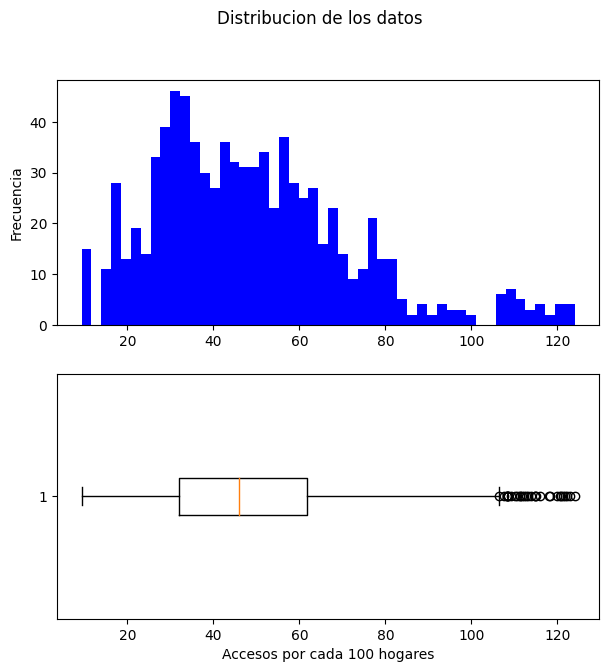

In [40]:
# Creamos una figura para las dos graficas (histograma y boxplot)
fig, ax = plt.subplots(2, 1, figsize = (7,7))

# Vemos la distribucion de los datos accesos por cada 100 hogorares, para esto graficamos un histograma
ax[0].hist(df_int_penetracion['Accesos por cada 100 hogares'] , color = 'blue', bins = 50)
ax[0].set_ylabel('Frecuencia')

# Graficamos un BoxPlot para ver mejor los datos atipicos
ax[1].boxplot(df_int_penetracion['Accesos por cada 100 hogares'], vert=False)
ax[1].set_xlabel('Accesos por cada 100 hogares')

fig.suptitle('Distribucion de los datos')

fig.show()

Se puede observar que la distribución de Accesos por cada 100 hogares es multimodal, lo que indica que los datos no siguen una distribución normal. 

También se pueden observar los datos atípicos que ya hablábamos anteriormente, se pueden ver en el histograma, los cuales se ven más claro en el grafico boxplot; es decir, el grafico nos dice que hay valores de accesos por cada 100 hogares mayores a 100, lo cual no puede ser posible a lo que se refiere esta medida. Por esta razón, debemos tomar acción con estos datos, reemplazaremos estos outliers detectados por el promedio de accesos a internet por cada 100 hogares. 

Se podían eliminar estos datos, pero en este caso, no queremos perder muchos datos para nuestro análisis.

In [41]:
# Calculamos el promedio de los datos para cambiar los valores mayores a 100
media = df_int_penetracion['Accesos por cada 100 hogares'].mean()

# Iteramos en la columna Accesos por cada 100 hogares para poder hacer los cambios correspondientes
for i in df_int_penetracion['Accesos por cada 100 hogares']:
    if i > 100:
        df_int_penetracion['Accesos por cada 100 hogares'] = df_int_penetracion['Accesos por cada 100 hogares'].replace(i, media)

# Rectificamos que se hayan realizado los cambios
df_int_penetracion.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,840.000000,840.000000,840.000000
mean,2017.885714,2.457143,46.386013
std,2.528745,1.105009,18.840643
min,2014.000000,1.000000,9.350000
25%,2016.000000,1.000000,32.107500
50%,2018.000000,2.000000,45.900000
75%,2020.000000,3.000000,58.252500
max,2022.000000,4.000000,99.860000


### _Dataframe 2_

Este contiene datos sobre el número de personas con acceso a internet por tecnologías.

In [42]:
# Creamos el dataframe importando el archivo a leer
df_acc_tecn = pd.read_csv('Internet_Accesos-por-tecnologia (1).csv')

# Vemos las dimensiones
print(df_acc_tecn.shape)

# Solo vemos los 5 primeros registros
df_acc_tecn.head()

(841, 9)


,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339.648,2.748.325,1.436.433,126.846,70.416,4.721.668
1,2022,3,Capital Federal,140.791,1.240.125,129.218,5.758,31.787,1.547.679
2,2022,3,Catamarca,10.010,10.495,46.224,1.329,2.235,70.293
3,2022,3,Chaco,27.164,61.800,44.645,8.178,2.359,144.146
4,2022,3,Chubut,45.377,72.212,9.574,29.784,8.831,165.778


In [43]:
# Vemos si hay datos nulos; como a su vez, observar el tipo de datos de las columnas
df_acc_tecn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           841 non-null    object 
 1   Trimestre     841 non-null    object 
 2   Provincia     840 non-null    object 
 3   ADSL          840 non-null    object 
 4   Cablemodem    840 non-null    object 
 5   Fibra óptica  840 non-null    object 
 6   Wireless      840 non-null    float64
 7   Otros         840 non-null    float64
 8   Total         840 non-null    object 
dtypes: float64(2), object(7)
memory usage: 59.3+ KB


Observamos que hay valores nulos y que muchas columnas no corresponden al tipo de dato adecuado, desde la columna ADSL hasta la columna Total realmente son números enteros, pero están siendo mal leído, por esta razón debemos de hacer los cambios correspondientes.  

In [44]:
# Eliminamos los valores nulos
df_acc_tecn = df_acc_tecn.dropna()

In [45]:
# Definimos una funcion que nos ayude a cambiar valores numericos a enteros 
def cambiar_a_entero (datos, n):
    
    ''' Esta función convierte columnas de un dataframe a tipo de datos entero, se le pasa como parámetro 
        un <datos> que es un dataframe y <n> que es un número que ayuda localizar la posición de las columnas
        del dataframe 
    '''

    # Iteramos en las columnas que se desean cambiar
    for n_columna in datos.iloc[:, n: ]:
        if datos[n_columna].dtype == object:
            datos[n_columna] = datos[n_columna].str.replace('.', '').astype(int)

        elif datos[n_columna].dtype == float:
            datos[n_columna] = datos[n_columna].astype(str)
            datos[n_columna] = datos[n_columna].str.replace('.', '').astype(int)

    return

In [46]:
# Aplicamos los cambios al df con la funcion
cambiar_a_entero(df_acc_tecn, 3)
df_acc_tecn.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339648,2748325,1436433,126846,70416,4721668
1,2022,3,Capital Federal,140791,1240125,129218,5758,31787,1547679
2,2022,3,Catamarca,10010,10495,46224,1329,2235,70293
3,2022,3,Chaco,27164,61800,44645,8178,2359,144146
4,2022,3,Chubut,45377,72212,9574,29784,8831,165778


In [47]:
# Vemos una descripcion estadistica de las columnas numericas del dataframe
df_acc_tecn.describe()

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,8.400000e+02,8.400000e+02,8.400000e+02,840.000000,840.000000,8.400000e+02
mean,1.275668e+05,1.717750e+05,2.991186e+04,9937.419048,6603.879762,3.457417e+05
std,2.550543e+05,4.221661e+05,1.235013e+05,17564.217475,10132.970568,7.419436e+05
min,6.842000e+03,0.000000e+00,0.000000e+00,0.000000,13.000000,1.255700e+04
25%,2.247925e+04,8.599750e+03,1.860000e+02,1158.500000,772.500000,5.202975e+04
50%,4.859600e+04,3.498400e+04,1.093000e+03,4262.000000,2734.500000,1.034895e+05
75%,1.045695e+05,7.074850e+04,1.386250e+04,11333.500000,7546.500000,1.779148e+05
max,1.586343e+06,2.748325e+06,1.436433e+06,126887.000000,73415.000000,4.721668e+06


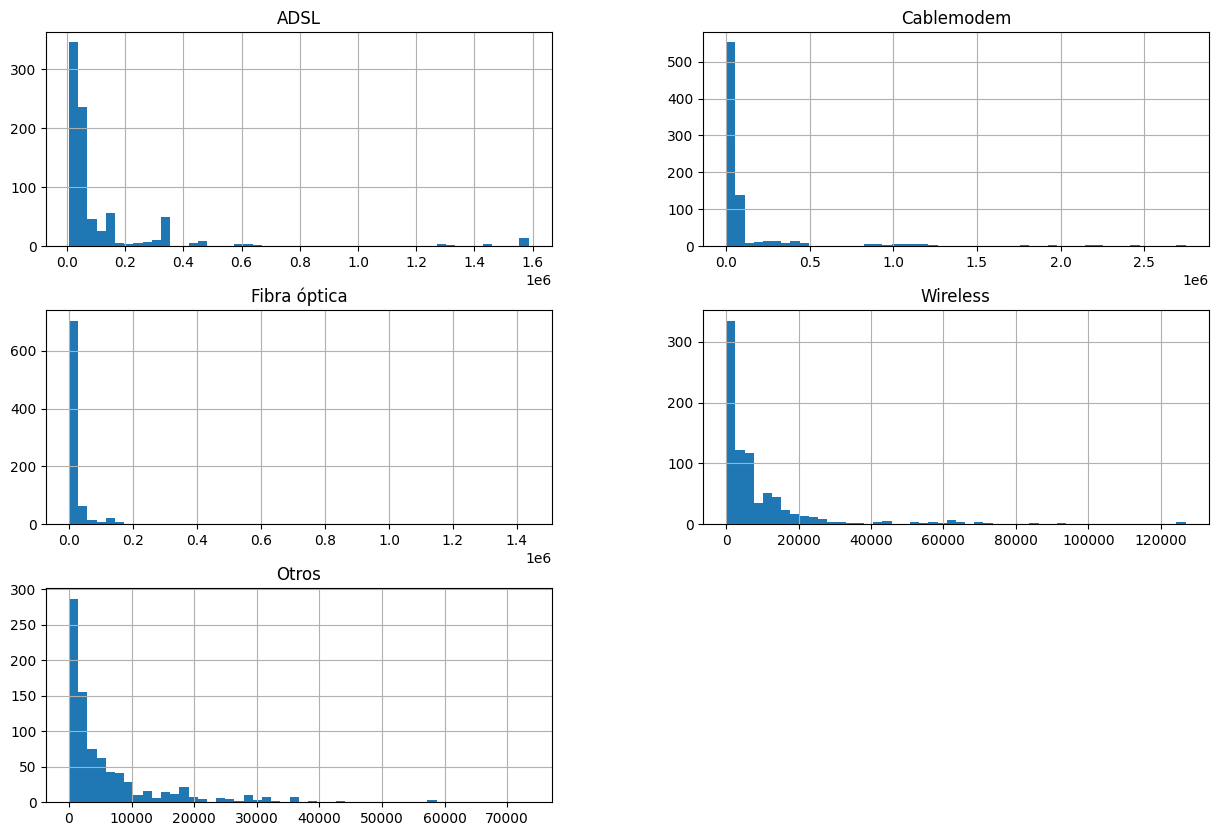

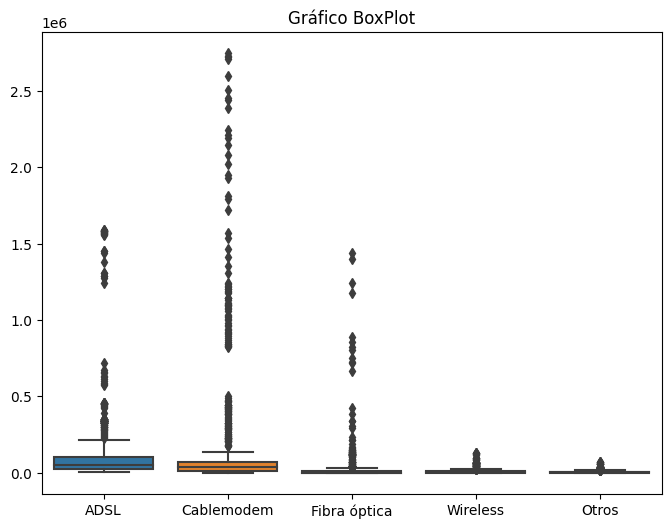

In [48]:
# Vemos la distribucion de los datos accesos por cada 100 hogorares, para esto graficamos un histograma 
df_acc_tecn.iloc[:,3:8].hist(bins = 50, figsize = (15,10))
plt.show()

# Tambien graficamos un BoxPlot para ver mejor los datos atipicos
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df_acc_tecn.iloc[:,3:8])
plt.title('Gráfico BoxPlot')
plt.show()

Observamos que en los gráficos de distribuciones los datos de las tecnologías tienen asimetría negativa, lo que significa que hay una mayor concentración de datos hacia la parte inferior del rango de valores de número de personas con acceso a dichas tecnologías y una menor concentración de datos hacia la parte superior del rango de valores de número de personas con acceso a dichas tecnologías.

Por otro lado, se observa en el grafico boxplot que hay valores fuera de los rangos intercuartil de las cajas, aquí no se infiere en que hayan outliers, por el contexto de los datos lo que puede estar sucediendo es que haya un patrón de crecimiento del acceso internet con estas tecnologías con respecto a medida que han ido pasando los años y trimestres de cada año. También pueden estar influyendo otros factores, tales como la población en cada provincia no son relativamente iguales, hay provincias con mucha más población que otras y viceversa, influyendo así en la cantidad de personas que acceden a internet con estas tecnologías, entre otras variantes.

Para corroborar esta hipótesis, realizamos gráficos de dispersión de estas tecnologías con respecto a los años.

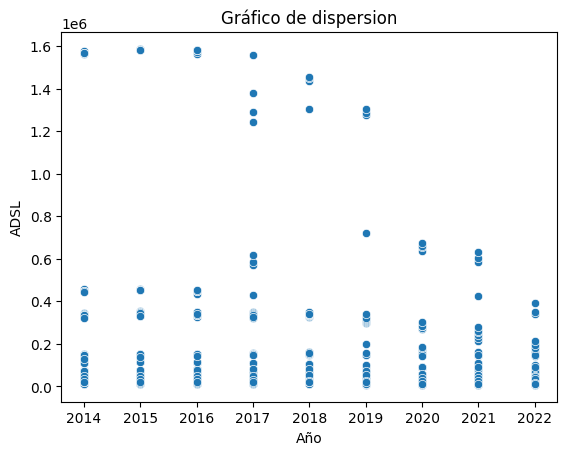

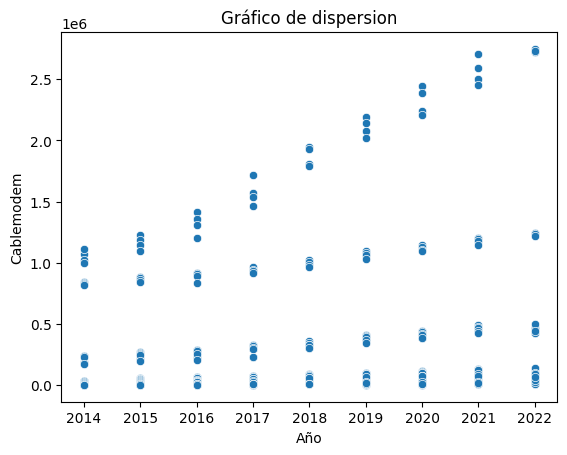

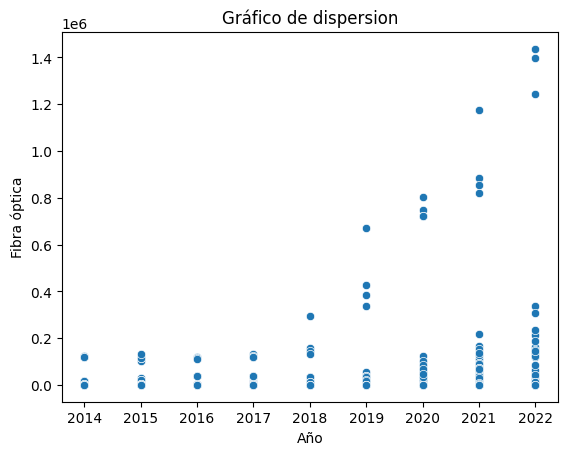

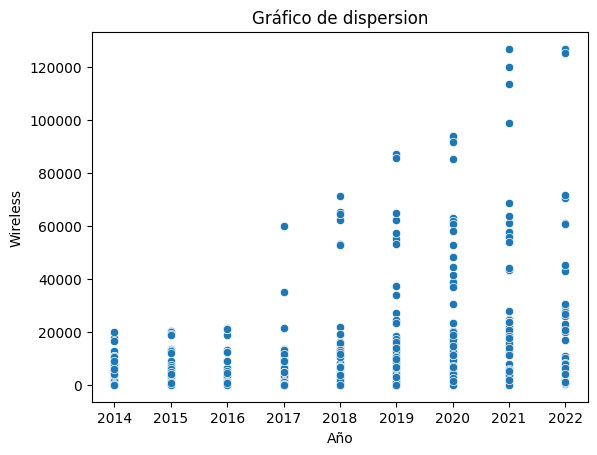

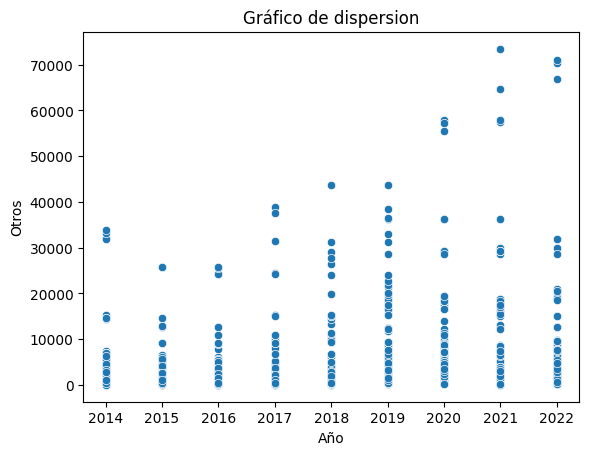

In [49]:
# Combertimos la columna año a entero, pero primero haciendo un ajuste con registros anormales, hay un registro de esta forma 2019 *
# el cual no nos deja cambiar a entero la columna, por eso ajustamos ese error
df_acc_tecn['Año'] = df_acc_tecn['Año'].str.replace(' *', '').astype(int)

# Creamos los graficos para cada tecnologia realizando un ciclo for a las columnas que nos interesan
for i in df_acc_tecn.iloc[:,3:8]:

    # Se crean los graficos
    sns.scatterplot(data=df_acc_tecn, x='Año', y=i)

    # Agregamos etiquetas y titulo a los graficos
    plt.xlabel('Año')
    plt.ylabel(i)
    plt.title('Gráfico de dispersion')

    # Se muestran los graficos
    plt.show()

Observamos que nuestra hipótesis se acopla a los gráficos, la mayoría de los datos tienen una mayor concentración en los valores más bajos, pero a medida que pasa el tiempo van creciendo, cuando nos referimos a tiempo hablamos de los años y trimestres de estos. Pero vemos que la tecnología ADSL ha disminuido el acceso de esta al pasar los años, esto puede deberse a que la tecnología ha ido quedando obsoleta con respecto a otras tecnologías, lo que implica un menor uso de esta y un mayor uso de las nuevas.

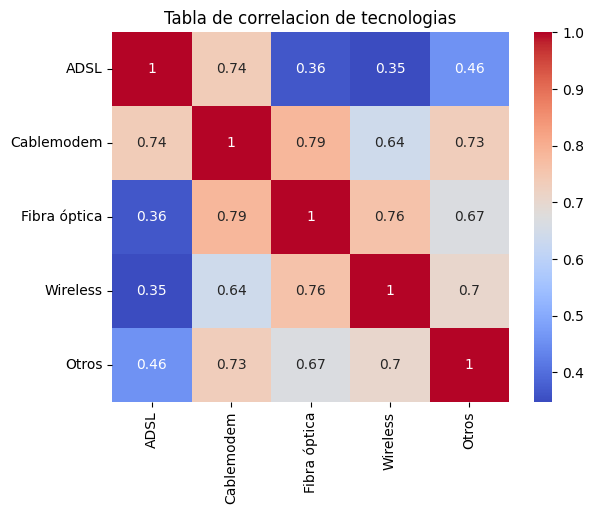

In [50]:
plt.title('Tabla de correlacion de tecnologias')
sns.heatmap(df_acc_tecn.iloc[:,3:8].corr(), annot=True, cmap="coolwarm")
plt.show()

Observamos que muchas tecnologías tienen una fuerte correlación entre si (determinamos correlación fuerte a tecnologías con correlaciones de 0.7 a 0.9), una de ellas es Cablemódem con Fibra óptica, con una correlación de 0.79, de lo cual podemos decir que cuando hay mayor acceso a internet con tecnologías de cablemódem hay mayor acceso a internet con tecnologías de Fibra óptica, o viceversa.

### _Dataframe 3_

Este contiene datos acerca del histórico de velocidad de internet por provincias

In [51]:
# Creamos el dataframe importando el archivo a leer
df_his_vel = pd.read_csv('historico_velocidad_internet (1).csv')

# Vemos las dimensiones
print(df_his_vel.shape)

# Solo vemos los 5 primeros registros
df_his_vel.head()

(840, 6)


,Año,Trimestre,Provincia,Mbps (Media de bajada),Unnamed: 4,Unnamed: 5
0,2022,3,Buenos Aires,70,NaN,NaN
1,2022,3,Capital Federal,101,NaN,NaN
2,2022,3,Catamarca,61,NaN,NaN
3,2022,3,Chaco,53,NaN,NaN
4,2022,3,Chubut,16,NaN,NaN


In [52]:
# Eliminamos las dos ultimas columnas, por conocimiento de los csv son coumnas vacias
df_his_vel = df_his_vel.drop(columns=['Unnamed: 4', 'Unnamed: 5'])

# Observamos si hay valores nulos y tipo de dato de las columnas
df_his_vel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     840 non-null    int64 
 1   Trimestre               840 non-null    int64 
 2   Provincia               840 non-null    object
 3   Mbps (Media de bajada)  840 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 26.4+ KB


In [53]:
# Vemos una descripcion estadistica de los datos numericos
df_his_vel.describe()

,Año,Trimestre,Mbps (Media de bajada)
count,840.000000,840.000000,840.000000
mean,2017.885714,2.457143,13.841667
std,2.528745,1.105009,14.669499
min,2014.000000,1.000000,3.000000
25%,2016.000000,1.000000,4.000000
50%,2018.000000,2.000000,7.000000
75%,2020.000000,3.000000,18.000000
max,2022.000000,4.000000,101.000000


Tenemos que la media de Mbps es de 13.8 y que la maxima es de 101. 

Veamos esto en un gráfico, observando la distribución y posibles outliers.

C:\Users\PERSONAL\AppData\Local\Temp\ipykernel_3536\4091015550.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


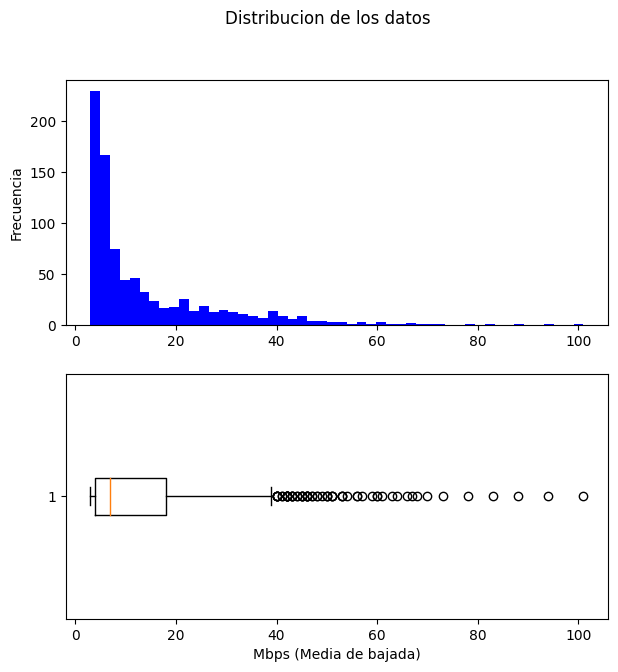

In [54]:
# Creamos una figura para las dos graficas (histograma y boxplot)
fig, ax = plt.subplots(2, 1, figsize = (7,7))

# Vemos la distribucion de los datos accesos por cada 100 hogorares, para esto graficamos un histograma
ax[0].hist(df_his_vel['Mbps (Media de bajada)'] , color = 'blue', bins = 50)
ax[0].set_ylabel('Frecuencia')

# Graficamos un BoxPlot para ver mejor los datos atipicos
ax[1].boxplot(df_his_vel['Mbps (Media de bajada)'], vert=False)
ax[1].set_xlabel('Mbps (Media de bajada)')

fig.suptitle('Distribucion de los datos')

fig.show()

Observamos que en el histograma la distribución de los datos Mbps tienen asimetría negativa, lo que significa que hay una mayor concentración de datos hacia la parte inferior del rango de valores, es decir, la Mbps se concentra en valores de 7 a 14 aproximadamente en las provincias.

Por otro lado, se observa en el grafico boxplot que hay valores fuera de los rangos intercuartil de las cajas, aquí no se infiere en que hayan outliers, por el contexto de los datos, ya que no todas las personas tienen el poder adquisitivo de costear un internet con altos Mbps.


### _Dataframe 4_

Este contiene datos acerca los accesos por velocidad de internet en las provincias

In [55]:
# Creamos el dataframe importando el archivo a leer
df_int_acc_vel = pd.read_csv('Internet_Accesos-por-velocidad.csv')

# Vemos las dimensiones
print(df_int_acc_vel.shape)

# Solo vemos los 5 primeros registros
df_int_acc_vel.head()

(840, 12)


,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29.985,27.709,290.315,297.915,267.044,124.190,3.618.689,65.821,4.721.668
1,2022,3,Capital Federal,517.000,5.742,34.371,67.829,51.946,28.692,1.253.105,105.477,1.547.679
2,2022,3,Catamarca,71.000,384.000,3.107,5.389,5.099,3.737,50.298,2.208,70.293
3,2022,3,Chaco,461.000,987.000,16.782,18.938,8.049,15.828,79.390,3.711,144.146
4,2022,3,Chubut,109.000,1.444,45.707,30.940,34.682,15.309,17.563,20.024,165.778


In [56]:
# Observamos si hay valores nulos y vemos el tipo de dato de las columnas
df_int_acc_vel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  840 non-null    int64  
 1   Trimestre            840 non-null    int64  
 2   Provincia            840 non-null    object 
 3   HASTA 512 kbps       840 non-null    float64
 4   + 512 Kbps - 1 Mbps  840 non-null    float64
 5   + 1 Mbps - 6 Mbps    840 non-null    object 
 6   + 6 Mbps - 10 Mbps   840 non-null    float64
 7   + 10 Mbps - 20 Mbps  840 non-null    float64
 8   + 20 Mbps - 30 Mbps  840 non-null    float64
 9   + 30 Mbps            840 non-null    object 
 10  OTROS                834 non-null    float64
 11  Total                840 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 78.9+ KB


Observamos que tenemos valores nulos en la columna OTROS y que los tipos de datos de la columna 4 hasta la última no corresponden al tipo de dato adecuando, en este caso a enteros.

Para esto rellenamos los valores nulos de dicha columna con ceros y posteriormente cambiamos los tipos de datos con la función que se había declarado anteriormente para hacer este tipo de cambios.

In [57]:
# Rellenamos los campos nulos de la columna OTROS
df_int_acc_vel['OTROS'] = df_int_acc_vel['OTROS'].fillna(0)

# Aplicamos funcion para cambiar columnas a tipo entero
cambiar_a_entero(df_int_acc_vel,3)

In [58]:
#  Vemos una descripcion estadistica de los datos numericos
df_int_acc_vel.describe()

,Año,Trimestre,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
count,840.000000,840.000000,840.000000,840.000000,8.400000e+02,840.000000,840.000000,840.000000,8.400000e+02,840.000000,8.400000e+02
mean,2017.885714,2.457143,2898.440476,10374.467857,1.509700e+05,33783.186905,34638.141667,19442.944048,7.917956e+04,4898.216667,3.439888e+05
std,2.528745,1.105009,10900.554628,21587.794231,3.481538e+05,60759.295096,87389.351535,70347.380887,3.426234e+05,12102.988402,7.373366e+05
min,2014.000000,1.000000,60.000000,0.000000,2.842000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.000000,1.240600e+04
25%,2016.000000,1.000000,320.000000,1347.000000,2.853925e+04,2967.750000,2039.500000,190.000000,7.000000e+00,0.000000,5.232825e+04
50%,2018.000000,2.000000,1050.000000,3760.500000,4.883450e+04,8303.500000,7766.000000,2214.500000,8.825000e+02,0.000000,1.043330e+05
75%,2020.000000,3.000000,2565.750000,8328.250000,8.689750e+04,29956.000000,24396.500000,9284.000000,1.966075e+04,5094.000000,1.775798e+05
max,2022.000000,4.000000,199768.000000,171244.000000,2.299705e+06,403575.000000,886678.000000,949093.000000,3.618689e+06,120464.000000,4.721668e+06


Se puede observar que hay un outlier o más en la columna OTROS, ya que hay un dato mínimo negativo, esto no puede ser posible por el contexto de los datos, recordemos que estos son los accesos a internet según velocidad que han habido durante los trimestres de cada año, es decir, o hubieron accesos (n > 0) o no hubieron acceso (n = 0). Por esto, cambiamos esos valores de entrada. 

In [59]:
# Iteramos en la columna para poder hacer los cambios requeridos
for i in df_int_acc_vel['OTROS']:
    if i < 0:
        df_int_acc_vel['OTROS'] = df_int_acc_vel['OTROS'].replace(i, 0)

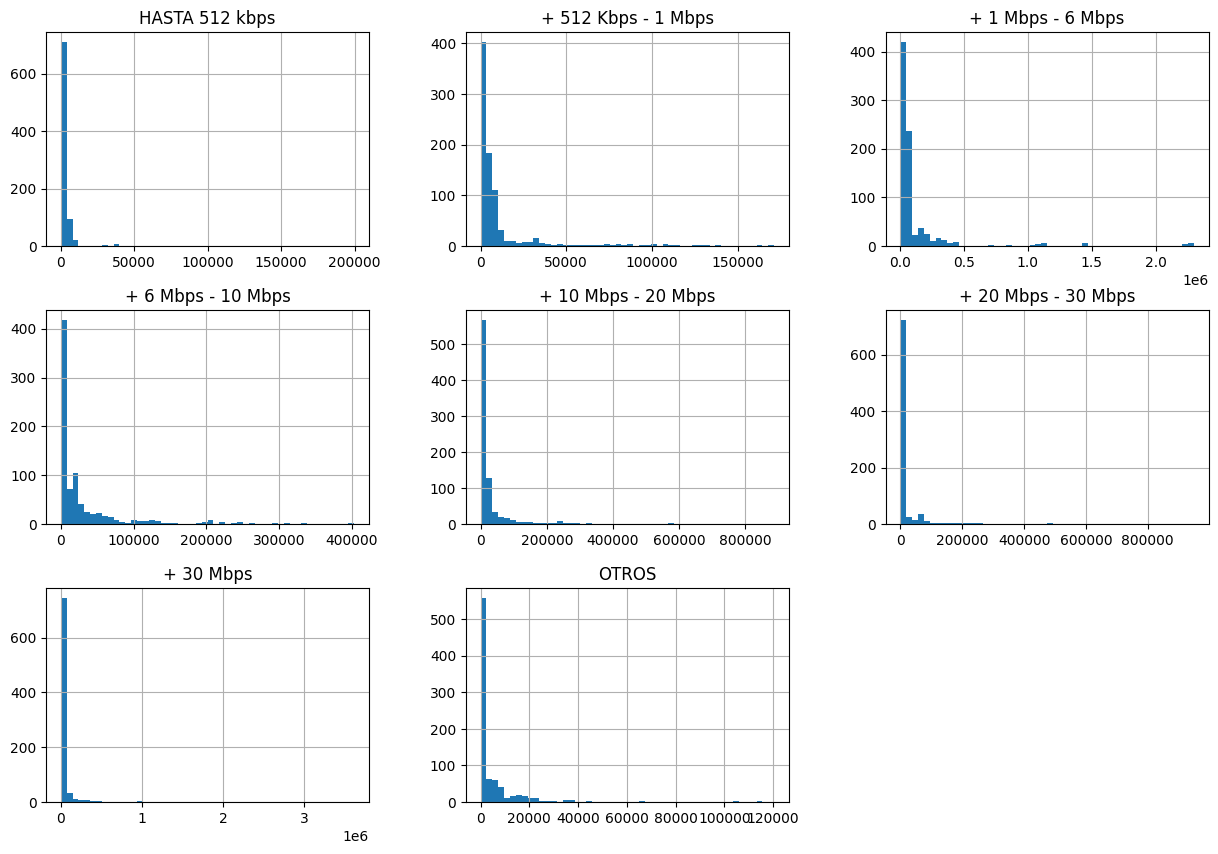

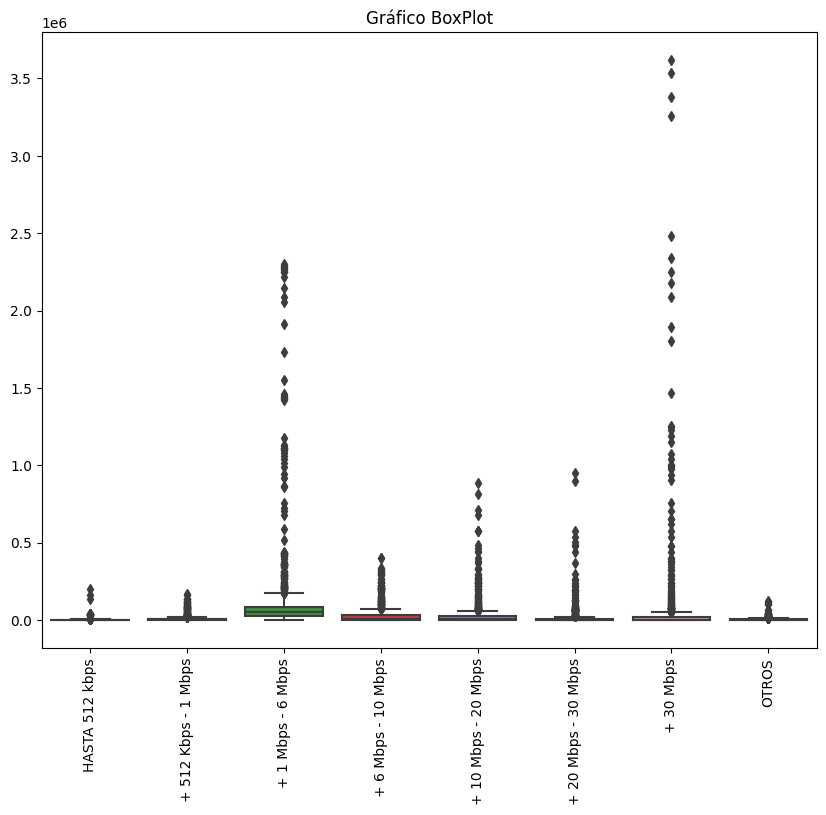

In [60]:
# Vemos la distribucion de los datos de velocidad de internet, para esto graficamos un histograma 
df_int_acc_vel.iloc[:,3:11].hist(bins = 50, figsize = (15,10))
plt.show()

# Tambien graficamos un BoxPlot para ver mejor los datos atipicos
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df_int_acc_vel.iloc[:,3:11])
plt.title('Gráfico BoxPlot')
plt.xticks(rotation=90)
plt.show()

Observamos que en los gráficos de distribuciones los datos de las velocidades de internet tienen asimetría negativa, lo que significa que hay una mayor concentración de datos hacia la parte inferior del rango de valores de número de personas con acceso a dichas velocidades y una menor concentración de datos hacia la parte superior del rango de valores de número de personas con acceso a dichas veocidades.

Por otro lado, se observa en el grafico boxplot que hay valores fuera de los rangos intercuartil de las cajas, aquí no se infiere en que hayan outliers, por el contexto de los datos, ya que en ciertos tiempos hay mayor acceso a internet de estas velocidades.

### _Dataframe 5_

Este contiene datos acerca de los ingresos (en miles de pesos) para la compañía

In [61]:
# Creamos el dataframe importando el archivo a leer
df_int_ing = pd.read_csv('Internet_Ingresos.csv')

# Vemos las dimensiones
print(df_int_ing.shape)

# Solo vemos los 5 primeros registros
df_int_ing.head()

(35, 4)


,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,3,67.055.930,Jul-Sept 2022
1,2022,2,60.335.724,Abr-Jun 2022
2,2022,1,55.589.997,Ene-Mar 2022
3,2021,4,45.467.887,Oct-Dic 2021
4,2021,3,42.999.944,Jul-Sept 2021


In [62]:
# Vemos si hay valores nulos y el tipo de dato de las columnas
df_int_ing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Año                        35 non-null     int64 
 1   Trimestre                  35 non-null     int64 
 2   Ingresos (miles de pesos)  35 non-null     object
 3   Periodo                    35 non-null     object
dtypes: int64(2), object(2)
memory usage: 1.2+ KB


In [63]:
# Cambiamos el tipo de dato de la columna Ingresos, pasandola a entero
df_int_ing['Ingresos (miles de pesos)'] = df_int_ing['Ingresos (miles de pesos)'].str.replace('.', '').astype(int)

C:\Users\PERSONAL\AppData\Local\Temp\ipykernel_3536\1500177379.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


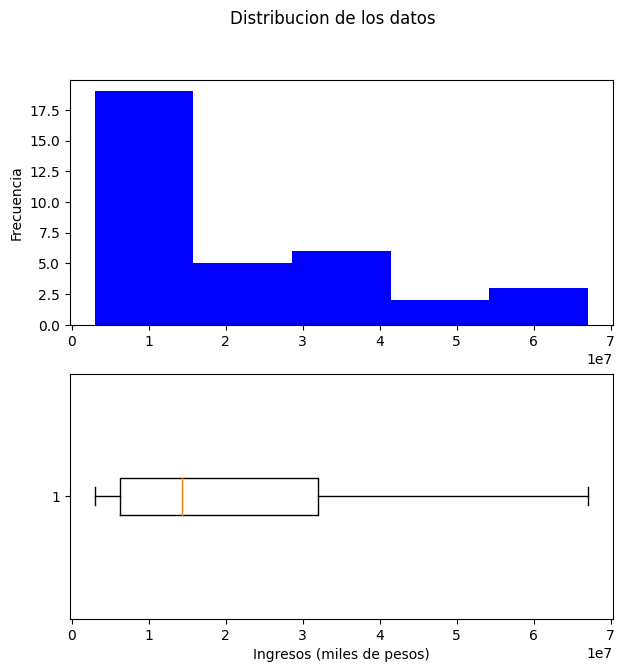

In [64]:
# Creamos una figura para las dos graficas (histograma y boxplot)
fig, ax = plt.subplots(2, 1, figsize = (7,7))

# Vemos la distribucion de los ingresos, para esto graficamos un histograma
ax[0].hist(df_int_ing['Ingresos (miles de pesos)'] , color = 'blue', bins = 5)
ax[0].set_ylabel('Frecuencia')

# Graficamos un BoxPlot para ver mejor los datos atipicos
ax[1].boxplot(df_int_ing['Ingresos (miles de pesos)'], vert=False)
ax[1].set_xlabel('Ingresos (miles de pesos)')

fig.suptitle('Distribucion de los datos')

fig.show()

Observamos que los datos se conforman de forma adecuada

### _Dataframe 6_

Este contiene datos acerca de la conectividad a internet en las localidades según tecnología

In [65]:
# Creamos el dataframe importando el archivo a leer
df_con_ser_int = pd.read_csv('ConectividadalserviciodeInternet_2776151682006239208.csv')

# Vemos las dimensiones
print(df_con_ser_int.shape)

# Solo vemos los 5 primeros registros
df_con_ser_int.head()

(4312, 16)


,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud
0,BUENOS AIRES,Bahía Blanca,Villa Bordeau,0,--,--,--,--,--,--,--,SI,SI,6056020.0,"-38,6472605094596","-62,3200223419024"
1,BUENOS AIRES,Bahía Blanca,Villa Espora,0,--,--,--,--,--,--,--,--,--,6056020.0,"-38,7765069529222","-62,1851833537179"
2,BUENOS AIRES,Balcarce,Balcarce,38376,SI,SI,SI,SI,--,SI,SI,SI,SI,6063010.0,"-37,8482779294345","-58,2551665841248"
3,BUENOS AIRES,Balcarce,Los Pinos,337,--,--,--,--,--,SI,SI,--,--,6063020.0,"-37,9412057603","-58,3225920150442"
4,BUENOS AIRES,Balcarce,Napaleofú,374,--,--,--,SI,--,SI,SI,SI,SI,6063030.0,"-37,6254980210026","-58,7461862359423"


In [66]:
# Observamos si hay valores nulos y los tipos de datos de las columnas
df_con_ser_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      4312 non-null   object 
 1   Partido        4312 non-null   object 
 2   Localidad      4312 non-null   object 
 3   Poblacion      4312 non-null   int64  
 4   ADSL           4312 non-null   object 
 5   CABLEMODEM     4312 non-null   object 
 6   DIALUP         4312 non-null   object 
 7   FIBRAOPTICA    4312 non-null   object 
 8   SATELITAL      4312 non-null   object 
 9   WIRELESS       4312 non-null   object 
 10  TELEFONIAFIJA  4312 non-null   object 
 11  3G             4312 non-null   object 
 12  4G             4312 non-null   object 
 13  link           4300 non-null   float64
 14  Latitud        4312 non-null   object 
 15  Longitud       4312 non-null   object 
dtypes: float64(1), int64(1), object(14)
memory usage: 539.1+ KB


Vemos que no hay valores nulos y que los tipos de datos corresponden a lo que deseamos trabajar para los informes

Ahora se procede a exportar los dataframe limpios y listos para diseñar los dashboard

In [67]:
df_int_penetracion.to_csv('internet_penetracion_limpio.csv')
df_acc_tecn.to_csv('internet_acceso_por_tecnologia_limpio.csv')
df_int_ing.to_csv('internet_ingreso_limpio.csv')
df_int_acc_vel.to_csv('internet_Accesos-por-velocidad_limpio.csv')
df_his_vel.to_csv('historico_velocidad_internet_limpio.csv')
df_con_ser_int.to_csv('ConectividadalserviciodeInternet_limpio.csv')